##  *Develop an agent that can achieve a specific goal using a sub-goal in order to accelarate learnign in a  maze 10X10 based on RL algorithm (Q-learning).*

In [1]:
# Import the necessary libraries to create the maze and give our agent the ability to randomly making choices

import numpy as np
import random
import torch

####  Setting up the environment WITH SUB-GOAL

In [2]:
# Implemetation of the maze 10X10 as indicated in the assignment. 

# 1 represents the walls (unpassable)
# 0 represents an open path (passable)
# S marks the starting point of the agent
# SG marks the sub-goal the agent should reach before continuing
# End marks the end goal

maze = np.array([[1,1,1,1,1,1,1,1,1,1],
                 [1,'S',1,0,0,0,1,0,0,1],
                 [1,0,1,0,1,0,1,0,1,1],
                 [1,0,0,0,1,0,0,0,0,1],
                 [1,1,1,0,1,1,1,1,0,1],
                 [1,0,1,'SG',0,0,0,1,0,1],
                 [1,0,0,0,1,1,0,0,0,1],
                 [1,1,1,0,1,0,1,1,0,1],
                 [1,0,0,0,0,0,1,'End',0,1],
                 [1,1,1,1,1,1,1,1,1,1]], dtype=object)



# Implementatio of the Q-Table
# Considering the maze above, and the Q-learning algorithm, we need to initiate
# the Q-table. The Q-table include all possible states-actions pairs and their corresponing Q-values.

q_table = np.zeros((10,10,4))   # each states have 4 possible actions (up, down, left, right)
actions = ['up', 'down', 'left', 'right']

# Implementation of the agent's starting position in the maze, the sub-goal and the end-goal

start_position = (1,1)
sub_goal = (5,3)
end_goal = (8,7)


# Implementation of the reward system

reward_sub_goal = 10
reward_end_goal = 100
penalty = -1    

# Implementation of the agent's interactions with the environment, the way the agent moves in the maze
# and the way penalties and rewards are given to the agent.

def moves_subgoal(state, actions):
    row, col = state

    if actions == 'up':
        next_state = (row - 1, col)
    elif actions == 'down':
        next_state = (row + 1, col)
    elif actions == 'left':
        next_state = (row, col - 1)
    elif actions == 'right':
        next_state = (row, col + 1)
    else:
        next_state = state

# Check if the next state is a wall or out of the maze
    if 0 <= next_state[0] < 10 and 0 <= next_state[1] < 10:
        if maze[next_state] != 1:
            if next_state == sub_goal:
                return next_state, reward_sub_goal, False   #Sub-goal reached 
            elif next_state == end_goal:
                return next_state, reward_end_goal, True    #End-goal reached
            else:
                return next_state, penalty, False           #No goal reached, keep searching
        else:
            return state, penalty, False                    #Hit a wall, stay in the same state
    else:
        return state, penalty, False                        #Out of the maze, stay in the same state



# Implementation of the starting funtion, in order to restart the agent's position in the maze
# at the end of each episode.

def restarting():
    return start_position


# Implementation of the selection of the agent's action.
# The agent will randomly choose the actions to take in the Q-table, based on the epsilon-greedy policy.
# The action with the highest Q-value will be chosen 

def select_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return np.random.randint(len(actions))
    else:
        return np.argmax(q_table[state[0], state[1]])

####  Setting up the environment WITHOUT SUB-GOAL

In [3]:
# Implemetation of the maze 10X10 as indicated in the assignment. 

# 1 represents the walls (unpassable)
# 0 represents an open path (passable)
# S marks the starting point of the agent
# End marks the end goal

maze = np.array([[1,1,1,1,1,1,1,1,1,1],
                 [1,'S',1,0,0,0,1,0,0,1],
                 [1,0,1,0,1,0,1,0,1,1],
                 [1,0,0,0,1,0,0,0,0,1],
                 [1,1,1,0,1,1,1,1,0,1],
                 [1,0,1,0,0,0,0,1,0,1],
                 [1,0,0,0,1,1,0,0,0,1],
                 [1,1,1,0,1,0,1,1,0,1],
                 [1,0,0,0,0,0,1,'End',0,1],
                 [1,1,1,1,1,1,1,1,1,1]], dtype=object)



# Implementatio of the Q-Table
# Considering the maze above, and the Q-learning algorithm, we need to initiate
# the Q-table. The Q-table include all possible states-actions pairs and their corresponing Q-values.

q_table = np.zeros((10,10,4))   # each states have 4 possible actions (up, down, left, right)
actions = ['up', 'down', 'left', 'right']

# Implementation of the agent's starting position in the maze, the sub-goal and the end-goal

start_position = (1,1)
end_goal = (8,7)


# Implementation of the reward system

reward_end_goal = 100
penalty = -1    

# Implementation of the agent's interactions with the environment, the way the agent moves in the maze
# and the way penalties and rewards are given to the agent.

def moves_NO_subgoal(state, actions):
    row, col = state

    if actions == 'up':
        next_state = (row - 1, col)
    elif actions == 'down':
        next_state = (row + 1, col)
    elif actions == 'left':
        next_state = (row, col - 1)
    elif actions == 'right':
        next_state = (row, col + 1)
    else:
        next_state = state

# Check if the next state is a wall or out of the maze
    if 0 <= next_state[0] < 10 and 0 <= next_state[1] < 10:
        if maze[next_state] != 1:
            if next_state == end_goal:
                return next_state, reward_end_goal, True    #End-goal reached
            else:
                return next_state, penalty, False           #No goal reached, keep searching
        else:
            return state, penalty, False                    #Hit a wall, stay in the same state
    else:
        return state, penalty, False                        #Out of the maze, stay in the same state



# Implementation of the starting funtion, in order to restart the agent's position in the maze
# at the end of each episode.

def restarting():
    return start_position


# Implementation of the selection of the agent's action.
# The agent will randomly choose the actions to take in the Q-table, based on the epsilon-greedy policy.
# The action with the highest Q-value will be chosen 

def select_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return np.random.randint(len(actions))
    else:
        return np.argmax(q_table[state[0], state[1]])

#### Hyperparameters

In [4]:
alpha = 0.1  # Learning rate
epsilon = 1.0  # Initial exploration rate. 
epsilon_variation = 0.99  # This parameter will decrease the epsilon value over time, in order to make the agent more greedy
min_epsilon = 0.01  # Minimum exploration rate reached by the agent
episodes = 500 # Number of episodes the agent will run
steps = 100  # Number of steps the agent will take in each episode

# The gamma parameters it will modify dynamically in the next cell in order to run different experiments


#### Implementation of the Q-learning algorithm

In [5]:
# Implementation of the Q-learning algorithm based on the mathematical formula
# Q(s,a) = Q(s,a) + alpha * (reward + gamma * max(Q(s',a')) - Q(s,a))

def q_value(state, action_index, reward, next_state):
    
    max_q_value = np.max(q_table[next_state[0], next_state[1]])
    actual_q_value = q_table[state[0], state[1], action_index]
    new_q_value = actual_q_value + alpha * (reward + gamma * max_q_value - actual_q_value)

    q_table[state[0], state[1], action_index] = new_q_value

#### Implementation of the training process and collection of data for analysis

In [6]:
# Initialize lists to store total rewards for different gamma experiments
total_rewards_gamma_09_NO_subgoal = []
total_rewards_gamma_01_No_subgoal = []
total_rewards_gamma_09_subgoal = []
total_rewards_gamma_01_subgoal = []

# Experiment parameters
experiments = [
    {'gamma': 0.1, 'moves_func': 'moves_NO_subgoal', 'label': 'Gamma 0.1 - No Subgoal'},
    {'gamma': 0.9, 'moves_func': 'moves_NO_subgoal', 'label': 'Gamma 0.9 - No Subgoal'},
    {'gamma': 0.1, 'moves_func': 'moves_subgoal', 'label': 'Gamma 0.1 - Subgoal'},
    {'gamma': 0.9, 'moves_func': 'moves_subgoal', 'label': 'Gamma 0.9 - Subgoal'}
]

for exp in experiments:
    # Set the experiment parameters
    gamma = exp['gamma']
    moves_func = exp['moves_func']

    # Reset the Q-table for each new experiment in order to not generate bias and learning in the next agent's experiments
    q_table = np.zeros((10,10,4))   # Reset Q-table to all zeros for each state-action pair

    # Reset epsilon to its initial value 
    epsilon = 1.0  # Reset epsilon to initial value before each experiment


    for episode in range(episodes):
        state = restarting()
        done = False
        total_reward = 0

        for step in range(steps):
            action_index = select_action(state, epsilon)
            action = actions[action_index]

            # Choose the moves function based on the experiment
            if moves_func == 'moves_subgoal':
                next_state, reward, done = moves_subgoal(state, action)
            else:
                next_state, reward, done = moves_NO_subgoal(state, action)

            # Update Q-value
            max_future_q = np.max(q_table[next_state[0], next_state[1]])
            current_q = q_table[state[0], state[1], action_index]
            q_table[state[0], state[1], action_index] = current_q + alpha * (reward + gamma * max_future_q - current_q)

            state = next_state
            total_reward += reward

            if done:
                break

        epsilon = max(min_epsilon, epsilon * epsilon_variation)

        # Store the total rewards based on the current experiment
        if gamma == 0.1 and moves_func == 'moves_NO_subgoal':
            total_rewards_gamma_01_No_subgoal.append(total_reward)
        elif gamma == 0.9 and moves_func == 'moves_NO_subgoal':
            total_rewards_gamma_09_NO_subgoal.append(total_reward)
        elif gamma == 0.1 and moves_func == 'moves_subgoal':
            total_rewards_gamma_01_subgoal.append(total_reward)
        elif gamma == 0.9 and moves_func == 'moves_subgoal':
            total_rewards_gamma_09_subgoal.append(total_reward)

# Now you can plot all experiments in one go




    #Print progress every 100 episodes
    if (episode + 1) % 100 == 0:
            print(f'Episode {episode + 1}/{episodes}, Total reward: {total_reward} for {exp["label"]}')

Episode 500/500, Total reward: 86 for Gamma 0.1 - No Subgoal
Episode 500/500, Total reward: 86 for Gamma 0.9 - No Subgoal
Episode 500/500, Total reward: 428 for Gamma 0.1 - Subgoal
Episode 500/500, Total reward: 417 for Gamma 0.9 - Subgoal


#### Plotting the results

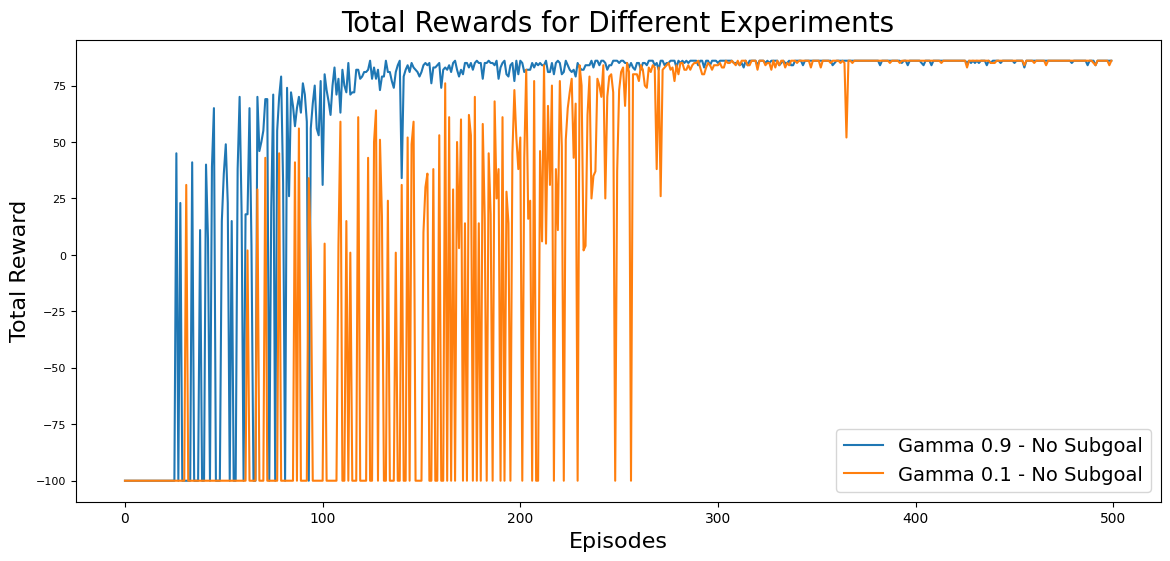

In [7]:
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(14, 6))

# Plot your data (for example)
plt.plot(range(500), total_rewards_gamma_09_NO_subgoal, label="Gamma 0.9 - No Subgoal")
plt.plot(range(500), total_rewards_gamma_01_No_subgoal, label="Gamma 0.1 - No Subgoal")
#plt.plot(range(500), total_rewards_gamma_09_subgoal, label="Gamma 0.9 - Subgoal")
#plt.plot(range(500), total_rewards_gamma_01_subgoal, label="Gamma 0.1 - Subgoal")

# Set title and labels with increased font sizes
plt.title("Total Rewards for Different Experiments", fontsize=20)
plt.xlabel("Episodes", fontsize=16)
plt.ylabel("Total Reward", fontsize=16)

# Increase tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

# Display legend with larger font size
plt.legend(fontsize=14)

# Show the plot
plt.show()


#### Table of max rewards point of each episode

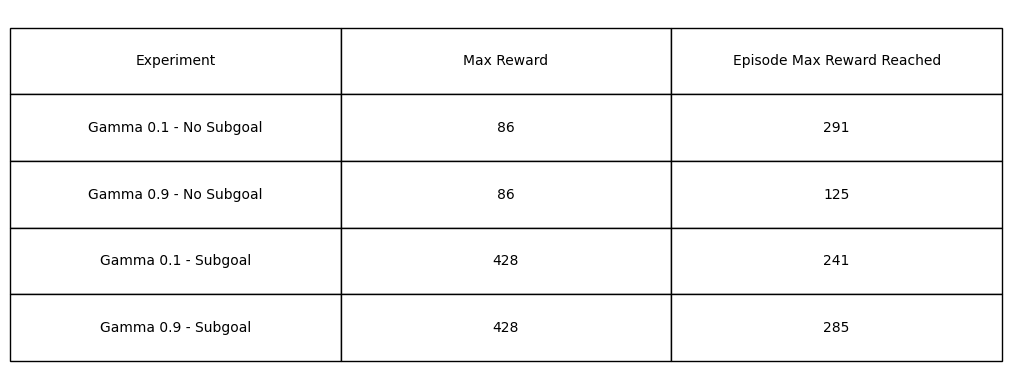

In [8]:
import matplotlib.pyplot as plt
import numpy as np

max_rewards_data = [
    ['Gamma 0.1 - No Subgoal', max(total_rewards_gamma_01_No_subgoal), total_rewards_gamma_01_No_subgoal.index(max(total_rewards_gamma_01_No_subgoal)) + 1],
    ['Gamma 0.9 - No Subgoal', max(total_rewards_gamma_09_NO_subgoal), total_rewards_gamma_09_NO_subgoal.index(max(total_rewards_gamma_09_NO_subgoal)) + 1],
    ['Gamma 0.1 - Subgoal', max(total_rewards_gamma_01_subgoal), total_rewards_gamma_01_subgoal.index(max(total_rewards_gamma_01_subgoal)) + 1],
    ['Gamma 0.9 - Subgoal', max(total_rewards_gamma_09_subgoal), total_rewards_gamma_09_subgoal.index(max(total_rewards_gamma_09_subgoal)) + 1]
]

columns = ['Experiment', 'Max Reward', 'Episode Max Reward Reached']

fig, ax = plt.subplots()

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table = ax.table(cellText=max_rewards_data, colLabels=columns, cellLoc='center', loc='center')

table.scale(2, 4)  # Increase table size for readability


plt.show()


#### extras for checking the performance of the agent

In [9]:
import cProfile

# Define your evaluation function
def evaluate_policy():
    sub_goal_reach_count = 0
    total_rewards = torch.zeros(100)  # Assuming you're not using CUDA for now
    steps_taken = torch.zeros(100)

    for episode in range(100):  # Set the number of evaluation episodes
        state = torch.tensor(restarting())
        done = False
        episode_reward = 0
        episode_steps = 0

        while not done and episode_steps < 1000:  # Limit steps per episode
            action_index = select_action((state[0].item(), state[1].item()), 0)  # Always choose the best action
            action = actions[action_index]
            next_state, reward, done = moves((state[0].item(), state[1].item()), action)
            next_state = torch.tensor(next_state)

            if (state[0].item(), state[1].item()) == sub_goal:
                sub_goal_reach_count += 1

            state = next_state
            episode_reward += reward
            episode_steps += 1

        total_rewards[episode] = episode_reward
        steps_taken[episode] = episode_steps

    print(f"Average Reward per Episode: {torch.mean(total_rewards):.2f}")
    print(f"Average Steps per Episode: {torch.mean(steps_taken):.2f}")
    print(f"Sub-goal Reach Count: {sub_goal_reach_count}")

# Run the profiler on the evaluation function
cProfile.run('evaluate_policy()')


         18 function calls in 0.022 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 3126056008.py:73(restarting)
        1    0.000    0.000    0.000    0.000 3126056008.py:81(select_action)
        1    0.006    0.006    0.022    0.022 745427005.py:4(evaluate_policy)
        1    0.000    0.000    0.022    0.022 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:1136(_argmax_dispatcher)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:1140(argmax)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:53(_wrapfunc)
        1    0.000    0.000    0.000    0.000 random.py:517(uniform)
        1    0.000    0.000    0.022    0.022 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.getattr}
        1    0.004    0.004    0.004    0.004 {built-in method torch.tensor}
        2    0.

NameError: name 'moves' is not defined